* below are 500 paths of 1mth LIBOR forwards

Numbers in the column labeled "0" are the LIBOR rates that apply now for a month (for all 500 paths, this rate is the same because today's rate already exists / it is known)

Numbers in the column labeled "1" are the 1mth LIBOR rates that start one month from now (the rates are different for each path because the rate is not yet known today)

Using the convention that now is time 0, then the final final cash flow/maturity for a 30yr mortgage with WALA = 0 would be at time M, where M=360 

* one of the steps in your assignment is to calculate the 10yr at-market swap rate for each path, at each point in time	

e.g. the 10yr at-market swap rate now, the 10yr at-market swap rate one month forward, the 10yr at-market swap rate two-months forward, etc.
    
The formula for the at-market swap rate is provided in lecture 5, and is a function of Risk Free Discount Factors at each point t
	
Since only 360 months of 1mL rates are provided to you, the last 10yr at-market swap rate you can calculate in the future is 20yrs forward

* for simplicity, assume the prevailing mortgage rate at each point in time in the future is the 10yr at-market swap rate + 175bps	


In [1]:
from modules.refi_model import *

In [2]:
rates = pd.read_csv("../data/rates.csv").iloc[:, 1:]
rates

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.17,0.207781,0.246529,0.282341,0.321245,0.361522,0.393842,0.422232,0.447774,0.467196,...,8.294575,8.593284,8.921497,9.240462,9.571914,9.865892,10.088298,10.315411,10.374439,9.914749
1,0.17,0.168326,0.163276,0.156809,0.210076,0.267976,0.322317,0.416459,0.509387,0.601480,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.17,0.151887,0.128522,0.104442,0.136492,0.172797,0.207411,0.207968,0.205720,0.202951,...,5.026223,5.241519,5.357425,5.108474,4.850636,4.590365,4.325628,4.048794,3.831389,3.761374
3,0.17,0.224221,0.281286,0.334716,0.396327,0.459815,0.513388,0.647035,0.779773,0.905922,...,1.551332,1.391414,1.300853,1.466777,1.637385,1.819387,2.031788,2.253292,2.433372,2.507868
4,0.17,0.175194,0.177711,0.178604,0.208558,0.241294,0.269605,0.260889,0.248937,0.233811,...,1.458988,1.458279,1.434790,1.352358,1.266220,1.205977,1.215315,1.225919,1.235502,1.237679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.17,0.194905,0.219469,0.241483,0.294324,0.350443,0.399166,0.435556,0.468390,0.494847,...,0.858545,0.872286,0.849984,0.724828,0.594672,0.522376,0.607977,0.697717,0.777658,0.832748
496,0.17,0.187594,0.203915,0.218094,0.252518,0.289348,0.320106,0.473671,0.629355,0.784251,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
497,0.17,0.188513,0.205888,0.221052,0.280424,0.343493,0.401139,0.370997,0.334605,0.291975,...,9.564078,10.124233,10.595515,10.633650,10.676703,10.758127,10.999607,11.249644,11.529578,11.894577
498,0.17,0.209564,0.250350,0.288072,0.372333,0.460583,0.541213,0.633240,0.721392,0.802853,...,13.126066,13.063548,13.057049,13.267903,13.468920,13.562020,13.328948,13.072493,12.919327,13.019230


In [3]:
DF = 1 / (1 + rates / 12 / 100)
DF = DF.cumprod(axis=1)

In [4]:
swap_rates = np.zeros(DF.shape)

for i in range(rates.shape[0]):
    swap_rates[i, :] = swap_rate(DF.iloc[i])

mortgage_rates = swap_rates + 0.0175

In [5]:
pd.DataFrame(mortgage_rates)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.075011,0.075918,0.076824,0.077730,0.078637,0.079552,0.080476,0.081411,0.082356,0.083309,...,0.248681,0.248681,0.248681,0.248681,0.248681,0.248681,0.248681,0.248681,0.248681,0.248681
1,0.019303,0.019303,0.019304,0.019304,0.019304,0.019304,0.019305,0.019305,0.019305,0.019305,...,0.019308,0.019308,0.019308,0.019308,0.019308,0.019308,0.019308,0.019308,0.019308,0.019308
2,0.028438,0.028732,0.029021,0.029306,0.029587,0.029865,0.030139,0.030409,0.030678,0.030949,...,0.041879,0.041879,0.041879,0.041879,0.041879,0.041879,0.041879,0.041879,0.041879,0.041879
3,0.053606,0.053852,0.054105,0.054365,0.054630,0.054902,0.055180,0.055465,0.055754,0.056044,...,0.117530,0.117530,0.117530,0.117530,0.117530,0.117530,0.117530,0.117530,0.117530,0.117530
4,0.032456,0.032575,0.032701,0.032835,0.032975,0.033127,0.033293,0.033472,0.033663,0.033867,...,0.085683,0.085683,0.085683,0.085683,0.085683,0.085683,0.085683,0.085683,0.085683,0.085683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.031602,0.031783,0.031972,0.032169,0.032374,0.032593,0.032827,0.033077,0.033343,0.033627,...,0.047085,0.047085,0.047085,0.047085,0.047085,0.047085,0.047085,0.047085,0.047085,0.047085
496,0.043543,0.043852,0.044164,0.044477,0.044788,0.045099,0.045407,0.045713,0.046019,0.046328,...,0.087358,0.087358,0.087358,0.087358,0.087358,0.087358,0.087358,0.087358,0.087358,0.087358
497,0.029457,0.029619,0.029782,0.029946,0.030114,0.030286,0.030462,0.030644,0.030827,0.031012,...,0.059980,0.059980,0.059980,0.059980,0.059980,0.059980,0.059980,0.059980,0.059980,0.059980
498,0.036579,0.036645,0.036715,0.036785,0.036854,0.036931,0.037019,0.037119,0.037217,0.037308,...,0.049274,0.049274,0.049274,0.049274,0.049274,0.049274,0.049274,0.049274,0.049274,0.049274


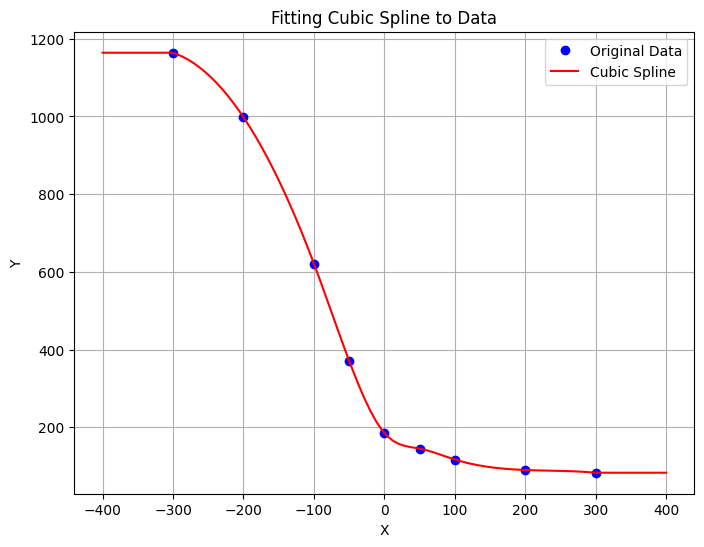

In [6]:
S_curve = pd.DataFrame(columns=[-300, -200, -100, -50, 0, 50, 100, 200, 300])
S_curve.loc['MED'] = [1164, 998, 621, 371, 185, 145, 117, 90, 83]

x = np.array(S_curve.columns)
y = np.array(S_curve.loc['MED'])

cs = CubicSpline(x, y)

# Generate points along the curve for plotting
x_curve = np.linspace(min(x)-100, max(x)+100, 100)
y_curve = S_fit(x_curve, cs)

# Plot the original data and the cubic spline curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x_curve, y_curve, 'r-', label='Cubic Spline')

plt.title('Fitting Cubic Spline to Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
refi_incentive = (0.0407 - mortgage_rates) * 10000
refi_incentive

array([[ -343.11453149,  -352.18057797,  -361.24017869, ...,
        -2079.80606657, -2079.80606657, -2079.80606657],
       [  213.96921618,   213.96652815,   213.96386073, ...,
          213.92173141,   213.92173141,   213.92173141],
       [  122.62064446,   119.67842668,   116.79013015, ...,
          -11.79371258,   -11.79371258,   -11.79371258],
       ...,
       [  112.43063441,   110.80820242,   109.18407861, ...,
         -192.80318   ,  -192.80318   ,  -192.80318   ],
       [   41.21425781,    40.54789419,    39.85298654, ...,
          -85.73548017,   -85.73548017,   -85.73548017],
       [   15.0357157 ,    11.21237174,     7.4031646 , ...,
         -595.64458824,  -595.64458824,  -595.64458824]], shape=(500, 360))

In [8]:
for i in range(refi_incentive.shape[0]):
    refi_incentive[i, :] = S_fit(refi_incentive[i, :], cs)

refi_incentive

array([[1164.        , 1164.        , 1164.        , ..., 1164.        ,
        1164.        , 1164.        ],
       [  89.15556961,   89.15570478,   89.15583892, ...,   89.1579587 ,
          89.1579587 ,   89.1579587 ],
       [ 106.11538463,  107.32777474,  108.57433506, ...,  215.40311513,
         215.40311513,  215.40311513],
       ...,
       [ 110.56479039,  111.33986046,  112.13476537, ...,  977.93377671,
         977.93377671,  977.93377671],
       [ 147.71140738,  147.9049601 ,  148.10826401, ...,  550.35269763,
         550.35269763,  550.35269763],
       [ 162.00494664,  166.39029177,  171.6774335 , ..., 1164.        ,
        1164.        , 1164.        ]], shape=(500, 360))

In [9]:
cprs = np.zeros_like(refi_incentive)

for i in range(refi_incentive.shape[0]):
    for j in range(refi_incentive.shape[1]):
        cprs[i, j] = psa_func(val=refi_incentive[i, j], period=refi_incentive.shape[1])[j]

cprs

array([[ 2.328     ,  4.656     ,  6.984     , ..., 69.84      ,
        69.84      , 69.84      ],
       [ 0.17831114,  0.35662282,  0.53493503, ...,  5.34947752,
         5.34947752,  5.34947752],
       [ 0.21223077,  0.4293111 ,  0.65144601, ..., 12.92418691,
        12.92418691, 12.92418691],
       ...,
       [ 0.22112958,  0.44535944,  0.67280859, ..., 58.6760266 ,
        58.6760266 , 58.6760266 ],
       [ 0.29542281,  0.59161984,  0.88864958, ..., 33.02116186,
        33.02116186, 33.02116186],
       [ 0.32400989,  0.66556117,  1.0300646 , ..., 69.84      ,
        69.84      , 69.84      ]], shape=(500, 360))

## 1. Build a toy OAS model

### Assume SMMs identical during first 33 months and solve for SMM such that factor is 0.64702083

In [10]:
smm = factor_to_smm(factor=0.783115983)
smm

np.float64(0.006385401096104428)

In [11]:
pool1 = PoolRefi(maturity=360, wac=0.0407, wala=29, smm=smm, init_principal=518318)

In [12]:
pt1 = PassthroughRefi(fee=0.0057).feed(pool1)
pt1.cpr(cprs[0])
pt1.show()

,Month,BeginPrincipal,InterestPymt,ScheduledPrincipalPymt,ActualPymt,UnscheduledPrincipalPymt,EndPrincipal,CumulativeInterestPaid,WAL,WAC,SMM,CPR
0,29,"$405,903.11","$1,376.69","$1,118.80","$3,289.28",$793.79,"$403,990.52","$1,376.69",1.877724,0.041,0.002,2.33
1,30,"$403,990.52","$1,370.20","$1,125.29","$4,092.99","$1,597.50","$401,267.73","$2,746.89",1.802886,0.041,0.004,4.66
2,31,"$401,267.73","$1,360.97","$1,134.53","$4,902.32","$2,406.82","$397,726.38","$4,107.86",1.731220,0.041,0.006,6.98
3,32,"$397,726.38","$1,348.96","$1,146.54","$5,712.68","$3,217.19","$393,362.65","$5,456.81",1.662560,0.041,0.008,9.31
4,33,"$393,362.65","$1,334.15","$1,161.34","$6,519.31","$4,023.82","$388,177.49","$6,790.97",1.596745,0.041,0.010,11.64
5,34,"$388,177.49","$1,316.57","$1,178.92","$7,317.23","$4,821.73","$382,176.83","$8,107.53",1.533628,0.041,0.012,13.97
6,35,"$382,176.83","$1,296.22","$1,199.28","$8,101.31","$5,605.81","$375,371.74","$9,403.75",1.473066,0.041,0.015,16.30
7,36,"$375,371.74","$1,273.14","$1,222.36","$8,866.33","$6,370.83","$367,778.55","$10,676.89",1.414927,0.041,0.017,18.62
8,37,"$367,778.55","$1,247.38","$1,248.11","$9,607.00","$7,111.50","$359,418.94","$11,924.27",1.359086,0.041,0.019,20.95
9,38,"$359,418.94","$1,219.03","$1,276.46","$10,318.01","$7,822.52","$350,319.96","$13,143.30",1.305425,0.041,0.022,23.28


## Solve for the OAS

In [14]:
def pv(cf, r, spread):
    pv = 0
    
    for i in range(len(cf)):
        pv += cf[i] / np.prod(1 + (r[:i+1]/100 + spread) / 12)
    
    return pv

def oas_objective_func(spread, rates):
    price = 104 + 21.5 / 32
    
    pt1 = PassthroughRefi(fee=0.0057).feed(pool1)
    
    curr_bal = pt1.passthrough['BeginPrincipal'].iloc[0]
    
    pv_val = 0
    for i in range(rates.shape[0]):
        pt1.cpr(cprs[i])
        cf = pt1.passthrough['ActualPymt']
        r = rates.values[i]
        pv_val += pv(cf, r, spread)
        
    return price / 100 * curr_bal - pv_val / rates.shape[0]
    
from scipy.optimize import fsolve

result = fsolve(oas_objective_func, 0.01, args=(rates))
oas = result[0]
print("oas:", oas)


oas: 0.0175957627536035


## 2. Assuming CPRs do not change when rates are shocked, calculate

In [18]:
def pv_chng(rate_chg):
    price = 104 + 21.5 / 32
    rates_new = rates + rate_chg

    pt1 = PassthroughRefi(fee=0.0057).feed(pool1)

    curr_bal = pt1.passthrough['BeginPrincipal'].iloc[0]

    pv_val = 0
    n = rates.shape[0]

    result = fsolve(oas_objective_func, 0.01, args=(rates_new))
    oas = result[0]

    for i in range(n):
        pt1.cpr(cprs[i])
        cf = pt1.passthrough['ActualPymt']
        r = rates_new.values[i]
        pv_val += pv(cf, r, oas)

    return pv_val / n / curr_bal * 100 - price

PV01  = pv_chng(0.0001)
PV50  = pv_chng(0.0050)
PV100 = pv_chng(0.0100)

print("PV01",  PV01)
print("PV50",  PV50)
print("PV100", PV100)

PV01 -5.684341886080802e-14
PV50 -1.1368683772161603e-13
PV100 1.7053025658242404e-13


In [22]:
result = fsolve(oas_objective_func, 0.01, args=(rates))
oas = result[0] # Hold oas

def pv_chng2(rate_chg):
    price = 104 + 21.5 / 32
    rates_new = rates + rate_chg

    DF = 1 / (1 + rates / 12 / 100)
    DF = DF.cumprod(axis=1)

    swap_rates = np.zeros(DF.shape)

    for i in range(rates.shape[0]):
        swap_rates[i, :] = swap_rate(DF.iloc[i])

    mortgage_rates = swap_rates + 0.0175

    refi_incentive = (0.0407 - mortgage_rates) * 10000

    for i in range(refi_incentive.shape[0]):
        refi_incentive[i, :] = S_fit(refi_incentive[i, :], cs)

    cprs = np.zeros_like(refi_incentive)

    for i in range(refi_incentive.shape[0]):
        for j in range(refi_incentive.shape[1]):
            cprs[i, j] = psa_func(val=refi_incentive[i, j], period=refi_incentive.shape[1])[j]

    pt1 = PassthroughRefi(fee=0.0057).feed(pool1)

    curr_bal = pt1.passthrough['BeginPrincipal'].iloc[0]

    pv_val = 0
    n = rates.shape[0]

    for i in range(n):
        pt1.cpr(cprs[i])
        cf = pt1.passthrough['ActualPymt']
        r = rates_new.values[i]
        pv_val += pv(cf, r, oas)

    return pv_val / n / curr_bal * 100 - price

PV01_oas_hold  = pv_chng2(0.0001)
PV50_oas_hold  = pv_chng2(0.0050)
PV100_oas_hold = pv_chng2(0.0100)

print("PV01",  PV01_oas_hold)
print("PV50",  PV50_oas_hold)
print("PV100", PV100_oas_hold)

PV01 -0.0003742586140873527
PV50 -0.018710439999949813
PV100 -0.0374157981410832


In [ ]:
plt.scatter([50,100], [PV50, PV100], label='#2')
plt.scatter([50,100], [PV50_oas_hold, PV100_oas_hold], label='#4')

plt.legend()
plt.xlabel("Shock to Forwards")
plt.ylabel("Chg in Price")
plt.title('Shock to Forwards vs. Chg in Price')
plt.show()

If we hold cpr while we update oas, the price does not change when rates increase. However, if we hold oas while we update cpr, the price decreases as rates increase. For #2, the cprs do not change as rates increase, which means that the prepayment plans do not change. In additional, the oas is adjusted to match the current price, so the price does not change much. For #4, the cprs change as rates increase, which means that the prepayments would decrease according to the increase. However, the impact of increase in discount factor dominates the change in the prepayment, which results in price decline.